In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
import scikitplot as skplt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier


In [3]:
data = pd.read_csv("Initial_Dataset_for_Breast_Cancer.csv")
data

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,2093,2094,2095,2096,2097,2098,2099,2100,2101,2102
0,0,0.313048,0.000000,0.176754,2.140981,0.686349,0.941132,1.141380,0.312192,0.720462,...,0.994368,0.017683,0.017692,0.017544,0.017239,0.017683,0.017692,0.017544,0.017239,1.0
1,1,0.602715,0.329558,0.242711,0.557647,0.086074,0.359702,0.581767,0.177707,0.218285,...,0.952594,0.053010,0.054360,0.057402,0.055195,0.053010,0.054360,0.057402,0.055195,1.0
2,2,0.565732,0.082301,0.344430,0.442048,0.085707,0.363159,0.608126,0.682426,0.102492,...,0.976982,0.028375,0.028027,0.029202,0.027934,0.028375,0.028027,0.029202,0.027934,0.0
3,3,0.275787,0.298946,0.099448,2.795300,0.130583,0.275633,0.380110,0.075912,0.931984,...,0.970719,0.044806,0.044220,0.045611,0.045375,0.044806,0.044220,0.045611,0.045375,1.0
4,4,0.326691,0.538105,0.261544,1.509163,0.301574,0.075008,0.487869,0.413204,0.639641,...,0.966571,0.036870,0.037082,0.038698,0.037046,0.036870,0.037082,0.038698,0.037046,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,0.546690,0.025378,0.220175,0.673222,0.224210,0.521370,0.850827,0.498328,0.353829,...,0.968754,0.041984,0.042236,0.042595,0.040967,0.041984,0.042236,0.042595,0.040967,1.0
4996,4996,0.435276,0.090048,0.331951,0.890124,0.081216,0.086908,0.734718,0.431234,0.658141,...,0.992078,0.030473,0.029700,0.030181,0.030222,0.030473,0.029700,0.030181,0.030222,1.0
4997,4997,0.230047,0.094342,0.081006,1.775814,0.300129,0.071314,0.567353,0.631290,0.614090,...,0.971167,0.034890,0.034877,0.036475,0.035135,0.034890,0.034877,0.036475,0.035135,0.0
4998,4998,0.265923,0.222426,0.129255,1.290293,0.229432,0.334901,0.463041,0.947550,0.614231,...,0.969471,0.036296,0.036785,0.038237,0.036713,0.036296,0.036785,0.038237,0.036713,0.0


In [4]:
df = data.drop('Unnamed: 0', axis=1)
df

,0,1,2,3,4,5,6,7,8,9,...,2093,2094,2095,2096,2097,2098,2099,2100,2101,2102
0,0.313048,0.000000,0.176754,2.140981,0.686349,0.941132,1.141380,0.312192,0.720462,0.088328,...,0.994368,0.017683,0.017692,0.017544,0.017239,0.017683,0.017692,0.017544,0.017239,1.0
1,0.602715,0.329558,0.242711,0.557647,0.086074,0.359702,0.581767,0.177707,0.218285,0.219596,...,0.952594,0.053010,0.054360,0.057402,0.055195,0.053010,0.054360,0.057402,0.055195,1.0
2,0.565732,0.082301,0.344430,0.442048,0.085707,0.363159,0.608126,0.682426,0.102492,0.131364,...,0.976982,0.028375,0.028027,0.029202,0.027934,0.028375,0.028027,0.029202,0.027934,0.0
3,0.275787,0.298946,0.099448,2.795300,0.130583,0.275633,0.380110,0.075912,0.931984,0.422508,...,0.970719,0.044806,0.044220,0.045611,0.045375,0.044806,0.044220,0.045611,0.045375,1.0
4,0.326691,0.538105,0.261544,1.509163,0.301574,0.075008,0.487869,0.413204,0.639641,0.634307,...,0.966571,0.036870,0.037082,0.038698,0.037046,0.036870,0.037082,0.038698,0.037046,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.546690,0.025378,0.220175,0.673222,0.224210,0.521370,0.850827,0.498328,0.353829,0.101110,...,0.968754,0.041984,0.042236,0.042595,0.040967,0.041984,0.042236,0.042595,0.040967,1.0
4996,0.435276,0.090048,0.331951,0.890124,0.081216,0.086908,0.734718,0.431234,0.658141,0.764741,...,0.992078,0.030473,0.029700,0.030181,0.030222,0.030473,0.029700,0.030181,0.030222,1.0
4997,0.230047,0.094342,0.081006,1.775814,0.300129,0.071314,0.567353,0.631290,0.614090,0.483055,...,0.971167,0.034890,0.034877,0.036475,0.035135,0.034890,0.034877,0.036475,0.035135,0.0
4998,0.265923,0.222426,0.129255,1.290293,0.229432,0.334901,0.463041,0.947550,0.614231,1.090309,...,0.969471,0.036296,0.036785,0.038237,0.036713,0.036296,0.036785,0.038237,0.036713,0.0


In [5]:
df.fillna(0, inplace=True)

In [6]:
scaler = MinMaxScaler()
scaler.fit(df)

MinMaxScaler()

In [23]:
X=df.drop("2102",axis=1)
Y=df["2102"]
seed = 1
X_train, X_rem, y_train, y_rem = train_test_split(X, Y, test_size=0.2, random_state=1)

In [24]:
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.25, random_state=1)

In [25]:
############ DECISION TREE ############

In [26]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

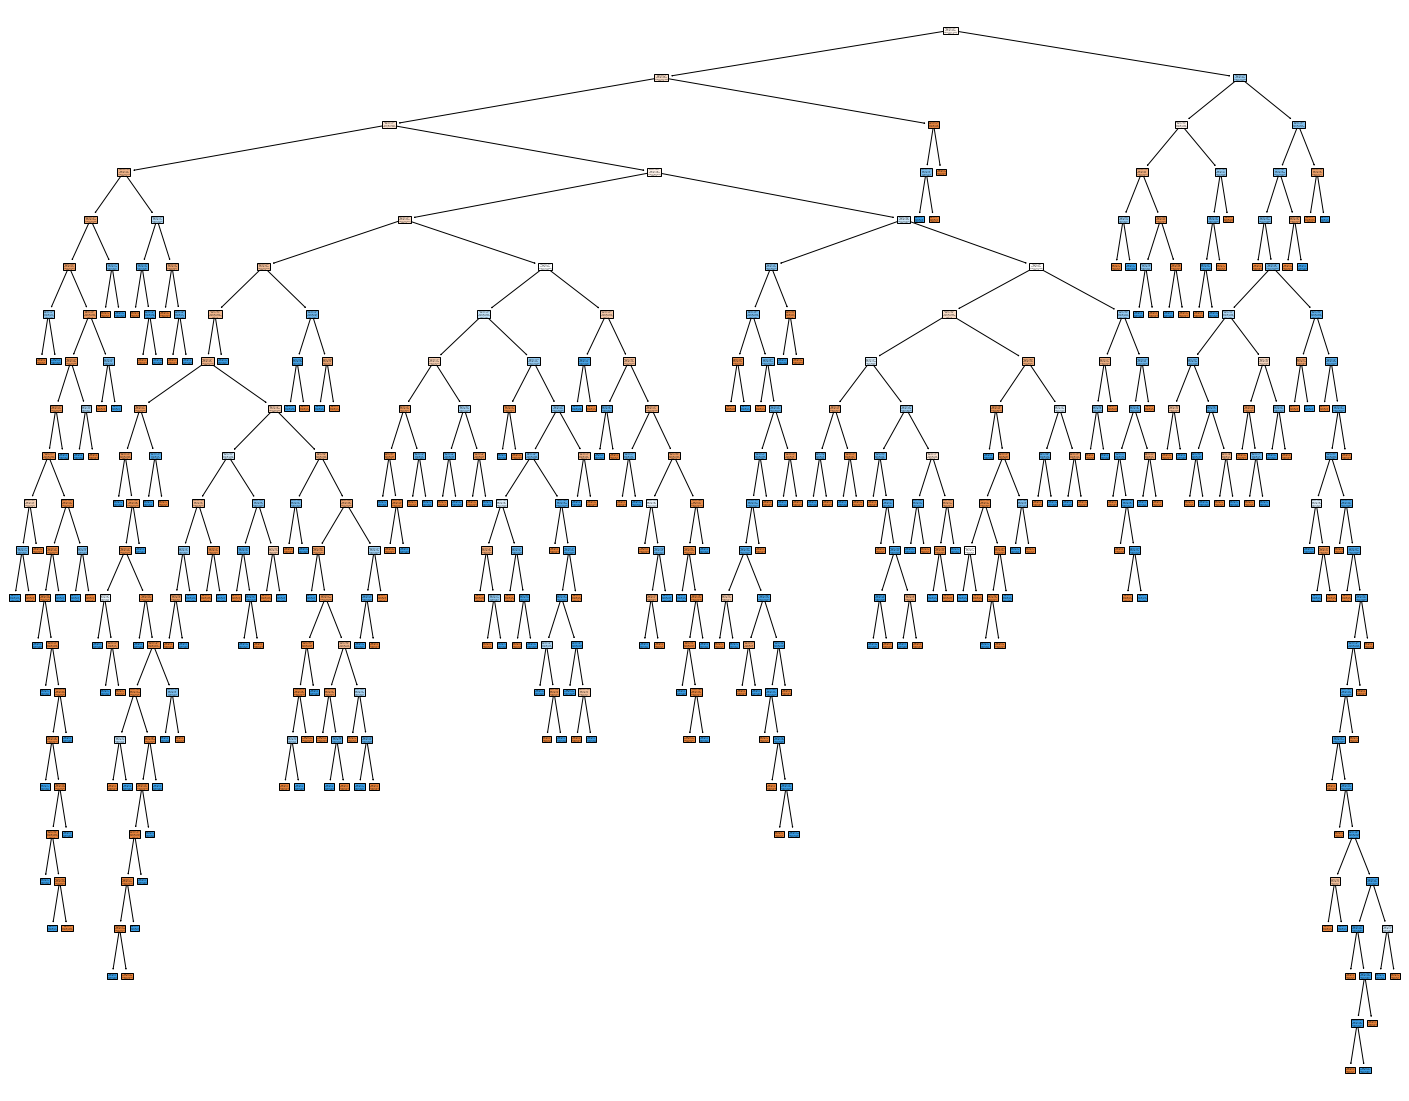

In [10]:

fig = plt.figure(figsize=(25,20))
tree_plot = tree.plot_tree(dt_model,
                   feature_names=X_train.columns,
                   class_names=['0', "100"],
                   filled=True)

In [27]:
dt_model.score(X_train,y_train)

1.0

In [28]:
dt_model.score(X_test,y_test)

0.804

In [29]:
prediction = dt_model.predict(X_test)
y_pred = prediction

In [30]:
metrics.accuracy_score(y_test, y_pred)

0.804

In [31]:
# use hyperparameter tuning to find the best parameters for our model 

#X=df.drop(2,axis=1)
#Y=df[2]
model_dt = DecisionTreeClassifier()

In [32]:
param_grid = {"max_depth":[36,39,40,41,42,43,44, 45, 47,50],"max_features":[6,7,8,9,10,11,12],'criterion':["gini",'entropy']}

In [33]:
g_search = GridSearchCV(estimator = model_dt, param_grid = param_grid, cv = 10, return_train_score=True)
g_search.fit(X_train, y_train);
print(g_search.best_params_)

{'criterion': 'gini', 'max_depth': 39, 'max_features': 10}


In [34]:
g_search.best_estimator_

DecisionTreeClassifier(max_depth=39, max_features=10)

In [35]:
classifier = DecisionTreeClassifier(max_depth = 39,max_features=10, criterion = "gini",random_state=1,splitter='best')
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=39, max_features=10, random_state=1)

In [36]:
y_pred

array([0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1.,
       0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 1.

In [38]:
y_pred = g_search.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.748

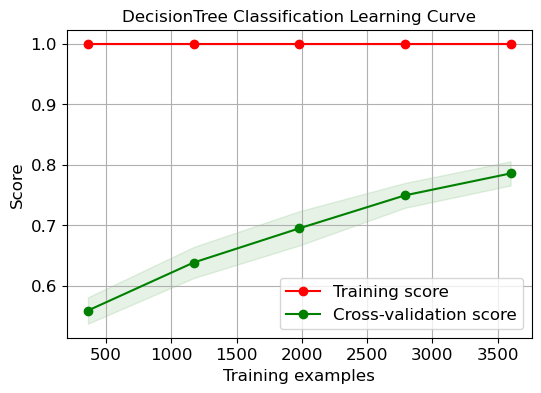

In [39]:
skplt.estimators.plot_learning_curve(DecisionTreeClassifier(), X_train, y_train,
                                     cv=10, shuffle=True, scoring="accuracy",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="DecisionTree Classification Learning Curve");

In [40]:
############ lOGISTIC REGRESSION ############

In [41]:
classifier = LogisticRegression(solver='lbfgs', max_iter=8000)
X=df.drop("2102",axis=1)
Y=df["2102"]
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=8000)

In [42]:
y_pred = classifier.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.824

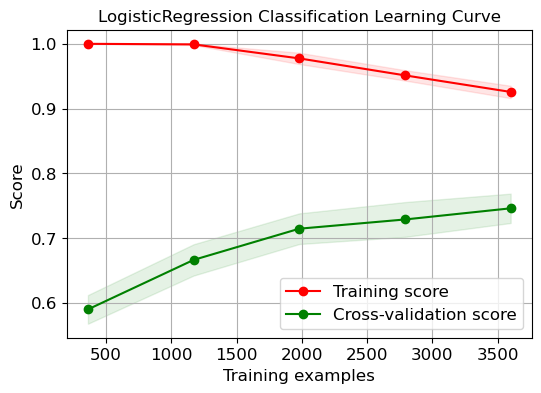

In [43]:
import scikitplot as skplt

skplt.estimators.plot_learning_curve(LogisticRegression(), X_train, y_train,
                                     cv=10, shuffle=True, scoring="accuracy",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="LogisticRegression Classification Learning Curve");

In [44]:
############ RANDOM FOREST ############

In [45]:
from sklearn.ensemble import RandomForestClassifier
rnd = RandomForestClassifier(n_jobs=-1)
rnd.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [46]:
pred_rnd = rnd.predict(X_test)

In [47]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_rnd))

              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93       140
         1.0       0.96      0.86      0.91       110

    accuracy                           0.92       250
   macro avg       0.93      0.92      0.92       250
weighted avg       0.93      0.92      0.92       250



In [48]:
metrics.accuracy_score(y_test, y_pred)

0.824

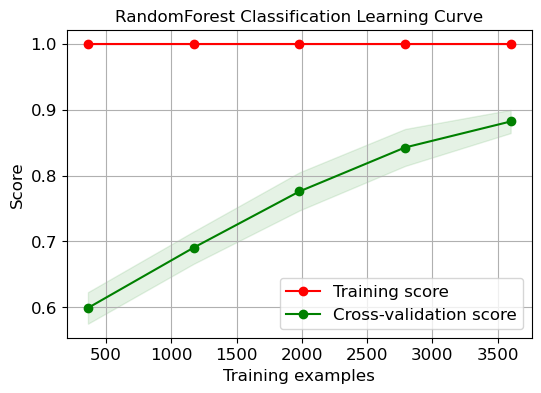

In [49]:
skplt.estimators.plot_learning_curve(RandomForestClassifier(), X_train, y_train,
                                     cv=10, shuffle=True, scoring="accuracy",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="RandomForest Classification Learning Curve");

In [50]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train, y_train)

SGDClassifier()

In [51]:
pred_sgd = sgd.predict(X_test)

In [52]:
metrics.accuracy_score(y_test, pred_sgd)

0.696

In [53]:
rnd_clf = RandomForestClassifier()
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

In [54]:
y_pred_rf

array([0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1.,
       0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1.,
       0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1.

In [55]:
metrics.accuracy_score(y_test, y_pred_rf)

0.916

In [56]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
ExtraTreesClassifier(random_state=0)
y_pred_rf= clf.predict(X_test)

In [57]:
metrics.accuracy_score(y_test, y_pred_rf)

0.944

In [58]:
# Feature Scaling (to make sure that data for different features are in the same range)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
# Instantiate the Support Vector Classifier (SVC)
from sklearn.svm import SVC
svc = SVC(C=1.0, random_state=1, kernel='linear')
 
# Fit the model
svc.fit(X_train_std, y_train)

In [ ]:
# Make the predictions
y_predict = svc.predict(X_test_std)
 
# Measure the performance
print("Accuracy score %.3f" %metrics.accuracy_score(y_test, y_predict))

In [ ]:
#takes too much time
#from sklearn.model_selection import learning_curve
#train_sizes, train_scores, valid_scores = learning_curve(SVC(kernel='linear'), X, Y, train_sizes=[3000, 2102], cv=10)

In [ ]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC(probability=True)

voting_clf = VotingClassifier(estimators = [('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)], voting='hard')
voting_clf.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

In [140]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
 
# Read data
data = fetch_california_housing()
X, y = data.data, data.target
 
# train-test split for model evaluation
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)
 
# Standardizing data
scaler = StandardScaler()
scaler.fit(X_train_raw)
X_train = scaler.transform(X_train_raw)
X_test = scaler.transform(X_test_raw)
 
# Convert to 2D PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)
 
# Define the model
model = nn.Sequential(
    nn.Linear(8, 24),
    nn.ReLU(),
    nn.Linear(24, 12),
    nn.ReLU(),
    nn.Linear(12, 6),
    nn.ReLU(),
    nn.Linear(6, 1)
)
 
# loss function, metrics, and optimizer
loss_fn = nn.MSELoss()  # mean square error
mae_fn = nn.L1Loss()  # mean absolute error
optimizer = optim.Adam(model.parameters(), lr=0.001)
 
n_epochs = 100   # number of epochs to run
batch_size = 32  # size of each batch
batch_start = torch.arange(0, len(X_train), batch_size)
 
train_mse_history = []
test_mse_history = []
test_mae_history = []
 
for epoch in range(n_epochs):
    model.train()
    epoch_mse = []
    for start in batch_start:
        # take a batch
        X_batch = X_train[start:start+batch_size]
        y_batch = y_train[start:start+batch_size]
        # forward pass
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        epoch_mse.append(float(loss))
        # backward pass
        optimizer.zero_grad()
        loss.backward()
        # update weights
        optimizer.step()
    mean_mse = sum(epoch_mse) / len(epoch_mse)
    train_mse_history.append(mean_mse)
    # validate model on test set
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test)
        mse = loss_fn(y_pred, y_test)
        mae = mae_fn(y_pred, y_test)
        test_mse_history.append(float(mse))
        test_mae_history.append(float(mae))

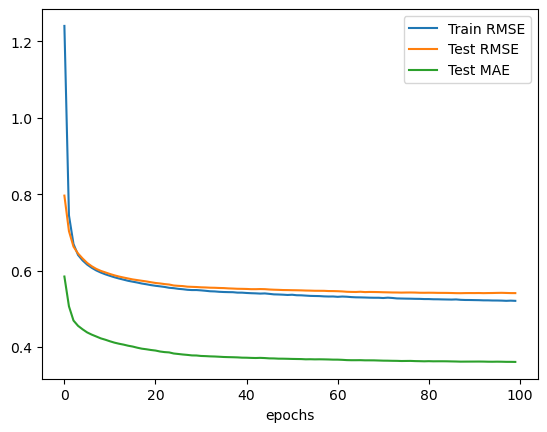

In [141]:

plt.plot(np.sqrt(train_mse_history), label="Train RMSE")
plt.plot(np.sqrt(test_mse_history), label="Test RMSE")
plt.plot(test_mae_history, label="Test MAE")
plt.xlabel("epochs")
plt.legend()
plt.show()

In [51]:
#svmm bc dataset

In [142]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn import metrics

In [143]:
# Load the data set
bc = datasets.load_breast_cancer()
X = bc.data
y = bc.target
 
# Create training and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [144]:
# Feature Scaling (to make sure that data for different features are in the same range)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [145]:
# Instantiate the Support Vector Classifier (SVC)
svc = SVC(C=1.0, random_state=1, kernel='linear')
 
# Fit the model
svc.fit(X_train_std, y_train)

SVC(kernel='linear', random_state=1)

In [146]:
# Make the predictions
y_predict = svc.predict(X_test_std)
 
# Measure the performance
print("Accuracy score %.3f" %metrics.accuracy_score(y_test, y_predict))

Accuracy score 0.953
